In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Simply import the new dataset created from the EDA
df = pd.read_csv('/Users/blancavaldes/Desktop/PcPartPicker3000/assignment/df_engineered.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported if not already
import numpy as np # Make sure numpy is imported if not already

# Assuming df is already loaded as per your notebook:
# df = pd.read_csv('/Users/blancavaldes/Desktop/PcPartPicker3000/assignment/df_engineered.csv')

In [5]:
print(df.head())
print(df.info())
print(df.describe())

                             titulo     tipo_de_producto              serie  \
0     Apple MacBook Air 13" 2024 M3  Portátil multimedia  Apple MacBook Air   
1     Apple MacBook Air 15" 2024 M3  Portátil multimedia  Apple MacBook Air   
2   Apple MacBook Pro 14" M4 (2024)  Portátil multimedia  Apple MacBook Pro   
3  ASUS TUF Gaming A15 FA506 (2024)      Portátil gaming    ASUS TUF Gaming   
4         GigaByte Aero 16 OLED BKF      Portátil gaming      Gigabyte Aero   

  pantalla_tecnologia            procesador disco_duro_tipo_de_disco_duro  \
0              Retina              Apple M3                           SSD   
1              Retina              Apple M3                           SSD   
2              Retina               Unknown                           SSD   
3             Full HD               Unknown                           SSD   
4                UHD+  Intel Core i7-13700H                           SSD   

  grafica_salida_de_video conectividad_lector_de_tarjetas  \
0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7914 entries, 0 to 7913
Data columns (total 66 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   titulo                                                  7914 non-null   object 
 1   tipo_de_producto                                        7914 non-null   object 
 2   serie                                                   7914 non-null   object 
 3   pantalla_tecnologia                                     3913 non-null   object 
 4   procesador                                              7914 non-null   object 
 5   disco_duro_tipo_de_disco_duro                           7914 non-null   object 
 6   grafica_salida_de_video                                 4571 non-null   object 
 7   conectividad_lector_de_tarjetas                         3913 non-null   object 
 8   comunicaciones_version_bluetooth      

In [ ]:
# PLEASE ADJUST THESE LISTS BASED ON YOUR ACTUAL df_engineered.csv columns
numerical_features = [] # e.g., ['CPU_Speed', 'RAM_Size', 'Storage_Size', 'Screen_Size', 'some_engineered_numeric_feature']
categorical_features = [] # e.g., ['Brand', 'Type', 'some_engineered_categorical_feature']
target_variable = 'Price' # Assuming 'Price' is the column name for the price

# Separate features (X) and target (y)
# Drop rows where the target variable might be NaN, if any
df.dropna(subset=[target_variable], inplace=True)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Identify actual numerical and categorical features present in X
# This is a safeguard in case the predefined lists don't perfectly match available columns
actual_numerical_features = [col for col in numerical_features if col in X.columns]
actual_categorical_features = [col for col in categorical_features if col in X.columns]

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, actual_numerical_features),
    ('categorical', categorical_pipeline, actual_categorical_features)
], remainder='passthrough') # 'passthrough' will keep any columns not specified in transformers

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both training and testing data
# This ensures that the same transformations are applied consistently
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after transformation (important for understanding processed data)
# This can be a bit tricky with ColumnTransformer, especially with 'passthrough'
# For one-hot encoded features:
try:
    onehot_feature_names = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(actual_categorical_features)
except AttributeError: # Older scikit-learn versions might not have get_feature_names_out
     onehot_feature_names = [] # Fallback or handle appropriately

# For remainder='passthrough' columns:
remainder_feature_names = [col for col in X.columns if col not in actual_numerical_features and col not in actual_categorical_features]

# Combine all feature names
processed_feature_names = list(actual_numerical_features) + list(onehot_feature_names) + list(remainder_feature_names)

# Convert processed arrays back to DataFrames (optional, but good for inspection)
X_train_processed_df = pd.DataFrame(X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed, columns=processed_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed, columns=processed_feature_names)

print("Shape of processed training data:", X_train_processed_df.shape)
print("Shape of processed testing data:", X_test_processed_df.shape)
print("First 5 rows of processed training data:")
print(X_train_processed_df.head())


In [7]:
# Cell 3: Feature Selection and Preprocessing
# Ensure previous cells have loaded df and imported necessary libraries:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt
# import seaborn as sns
# df = pd.read_csv('/Users/blancavaldes/Desktop/PcPartPicker3000/assignment/df_engineered.csv')

target_variable = 'precio_mean'

# Based on your df.info(), selecting features with high non-null counts primarily
selected_numerical_features = [
    'disco_duro_numero_de_discos_duros_instalados', # 7914 non-null
    'procesador_numero_nucleos', # 7914 non-null
    'medidas_y_peso_profundidad_cm', # 7914 non-null
    'medidas_y_peso_ancho_cm', # 7914 non-null
    'procesador_cache_mb', # 7866 non-null
    'ram_memoria_gb', # 7866 non-null
    'ram_frecuencia_de_la_memoria_mhz', # 7863 non-null
    'disco_duro_capacidad_de_memoria_ssd_gb', # 7862 non-null
    'procesador_frecuencia_turbo_max_ghz', # 7914 non-null
    'equip_altavoces_estéreo', # 7914 non-null (int64, binary-like)
    'equip_refrigeración_líquida', # 7914 non-null (int64, binary-like)
    'equip_usb_c' # 7914 non-null (int64, binary-like)
]

selected_categorical_features = [
    'tipo_de_producto', # 7914 non-null
    'disco_duro_tipo_de_disco_duro', # 7914 non-null
    'procesador_fabricante', # 7914 non-null
    'procesador_tipo', # 7914 non-null
    'sistema_operativo_sistema_operativo', # 7914 non-null
    'ram_tipo', # 7914 non-null
    'grafica_tipo_memoria', # 7914 non-null
    'comunicaciones_estandar_lan', # 7914 non-null
    'tipo', # 7914 non-null (Please verify if this is distinct and useful alongside tipo_de_producto)
    'custom_category', # 7914 non-null
    'grafica_memoria' # 7914 non-null. Values need to be suitable for one-hot encoding. If they are like "4GB", "8GB", "shared", they might need parsing or a different strategy. Assuming it's categorical for now.
]

# --- Data Cleaning ---
# Ensure target_variable is not NaN
df.dropna(subset=[target_variable], inplace=True)

all_features_for_model = selected_numerical_features + selected_categorical_features

# Drop rows where ANY of these selected features are NaN
# This is a strict approach. Imputation would be better for features with many NaNs if those features are crucial.
print(f"Dataset size before dropping NaNs in selected features: {len(df)}")
df_cleaned = df.dropna(subset=all_features_for_model).copy() # Use .copy() to avoid SettingWithCopyWarning
print(f"Dataset size after dropping NaNs in selected features: {len(df_cleaned)}")

if df_cleaned.empty:
    raise ValueError("DataFrame is empty after dropping NaNs from selected features. Consider imputing missing values or using features with fewer NaNs. Check the non-null counts of your selected features.")

X = df_cleaned[all_features_for_model]
y = df_cleaned[target_variable]

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, selected_numerical_features),
    ('categorical', categorical_pipeline, selected_categorical_features)
], remainder='drop') # Ensure only specified features are used

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after transformation
processed_numerical_features = selected_numerical_features
try:
    processed_onehot_features = list(preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(selected_categorical_features))
except Exception as e:
    print(f"Warning: Could not get feature names from OneHotEncoder automatically: {e}. Fallback might be needed if column names are incorrect.")
    # Fallback: Estimate number of one-hot columns if get_feature_names_out fails
    num_onehot_cols = X_train_processed.shape[1] - len(processed_numerical_features)
    processed_onehot_features = [f'onehot_feature_{i}' for i in range(num_onehot_cols)]

processed_feature_names = processed_numerical_features + processed_onehot_features

# Convert processed arrays back to DataFrames, including original index
if X_train_processed.shape[1] == len(processed_feature_names):
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)
else:
    print(f"Warning: Shape mismatch. Processed features: {X_train_processed.shape[1]}, Names generated: {len(processed_feature_names)}")
    X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index) # Create DataFrame without column names if mismatch
    X_test_processed_df = pd.DataFrame(X_test_processed, index=X_test.index)

print(f"\nOriginal X_train shape: {X_train.shape}") # Should reflect columns in all_features_for_model
print(f"Processed X_train_processed_df shape: {X_train_processed_df.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Processed X_test_processed_df shape: {X_test_processed_df.shape}")

if not X_train_processed_df.empty:
    print("\nFirst 5 rows of processed training data (X_train_processed_df):")
    print(X_train_processed_df.head())
else:
     print("\nWarning: Processed training data is empty or DataFrame creation failed. Check preprocessing steps and data integrity.")

Dataset size before dropping NaNs in selected features: 7914
Dataset size after dropping NaNs in selected features: 7853

Original X_train shape: (6282, 23)
Processed X_train_processed_df shape: (6282, 207)
Original X_test shape: (1571, 23)
Processed X_test_processed_df shape: (1571, 207)

First 5 rows of processed training data (X_train_processed_df):
      disco_duro_numero_de_discos_duros_instalados  procesador_numero_nucleos  \
4592                                      0.019264                  -0.411358   
432                                       0.019264                   1.249275   
7181                                      0.019264                  -0.826517   
6361                                      0.019264                  -0.826517   
2118                                      0.019264                  -1.241675   

      medidas_y_peso_profundidad_cm  medidas_y_peso_ancho_cm  \
4592                       2.714805                -0.444049   
432                       -0.5

In [8]:
# Cell 4: KNN for Price Prediction (KNeighborsRegressor)
knn_regressor = KNeighborsRegressor(n_neighbors=5) # Start with k=5, can be tuned

# Train the model using the processed training data
knn_regressor.fit(X_train_processed_df, y_train)

# Make predictions on the processed test data
y_pred_knn = knn_regressor.predict(X_test_processed_df)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nKNeighborsRegressor Performance:")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")

# Display some actual vs. predicted prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price (KNN)': y_pred_knn})
print("\nSample Predictions:")
print(predictions_df.head())


KNeighborsRegressor Performance:
RMSE: 805.59
R-squared: 0.57

Sample Predictions:
      Actual Price  Predicted Price (KNN)
5732        266.90                206.540
5074       1464.99               1409.190
6948        842.90                899.508
4917        995.50               1133.296
2388       2859.80               1362.588


In [9]:
# Cell 5: KNN for Finding Similar Items (NearestNeighbors)
# We use the same processed data (X_train_processed_df) to fit this model
# It learns the "locations" of all items in the feature space.
# n_neighbors will include the item itself, so if you want k *similar* items, use n_neighbors=k+1
nn_model = NearestNeighbors(n_neighbors=6, metric='minkowski') # k=5 similar items + itself
nn_model.fit(X_train_processed_df) # Fit on the training data representations

print("\nNearestNeighbors model fitted.")
print(f"Model will find the {nn_model.n_neighbors -1 } most similar items from the training set.")


NearestNeighbors model fitted.
Model will find the 5 most similar items from the training set.


In [10]:
# Cell 6: Example Usage - Finding K-Best Offers
if not X_test_processed_df.empty and not X_train_processed_df.empty:
    # Take a sample item from the test set to find neighbors for
    sample_index = 0 # Or any other index from X_test_processed_df
    query_item_processed = X_test_processed_df.iloc[[sample_index]]
    query_item_original_features = X_test.iloc[[sample_index]]
    query_item_actual_price = y_test.iloc[sample_index]

    print(f"\n--- Query Item (from test set, index {X_test.index[sample_index]}) ---")
    print("Original Features:")
    print(query_item_original_features)
    print(f"Actual Price: {query_item_actual_price:.2f}")

    # Find neighbors for the query item from the training set
    distances, indices = nn_model.kneighbors(query_item_processed)
    
    neighbor_indices_in_original_X_train = X_train.index[indices.flatten()]

    print(f"\n--- {nn_model.n_neighbors -1} Most Similar Offers (from training set) ---")
    
    # Retrieve original features, actual prices, and predict prices for neighbors
    neighbor_df_list = []
    for i, (idx, dist) in enumerate(zip(neighbor_indices_in_original_X_train, distances.flatten())):
        neighbor_original_features = X_train.loc[idx]
        neighbor_actual_price = y_train.loc[idx]
        
        # Get the processed version of this neighbor to predict its price with knn_regressor
        # This assumes knn_regressor was trained on X_train_processed_df
        neighbor_processed_features = X_train_processed_df.loc[[idx]]
        neighbor_predicted_price = knn_regressor.predict(neighbor_processed_features)[0]
        
        neighbor_info = {
            'Original_Index_in_Train': idx,
            'Similarity_Distance': dist,
            'Actual_Price': f"{neighbor_actual_price:.2f}",
            'Predicted_Price_KNN': f"{neighbor_predicted_price:.2f}"
        }
        # Add some key original features for comparison - choose a few important ones
        for col in ['tipo_de_producto', 'procesador_fabricante', 'ram_memoria_gb', 'disco_duro_capacidad_de_memoria_ssd_gb']:
            if col in neighbor_original_features:
                neighbor_info[col] = neighbor_original_features[col]
        
        neighbor_df_list.append(neighbor_info)

    results_df = pd.DataFrame(neighbor_df_list)
    print(results_df)

else:
    print("\nSkipping example usage as processed data is empty or not available.")



--- Query Item (from test set, index 5732) ---
Original Features:
      disco_duro_numero_de_discos_duros_instalados  procesador_numero_nucleos  \
5732                                           1.0                        4.0   

      medidas_y_peso_profundidad_cm  medidas_y_peso_ancho_cm  \
5732                           29.4                     16.8   

      procesador_cache_mb  ram_memoria_gb  ram_frecuencia_de_la_memoria_mhz  \
5732                 18.0             8.0                            3200.0   

      disco_duro_capacidad_de_memoria_ssd_gb  \
5732                                   256.0   

      procesador_frecuencia_turbo_max_ghz  equip_altavoces_estéreo  ...  \
5732                                  3.4                        0  ...   

      disco_duro_tipo_de_disco_duro  procesador_fabricante procesador_tipo  \
5732             disco duro M.2 SSD                  Intel         Intel N   

     sistema_operativo_sistema_operativo ram_tipo grafica_tipo_memoria  \
573

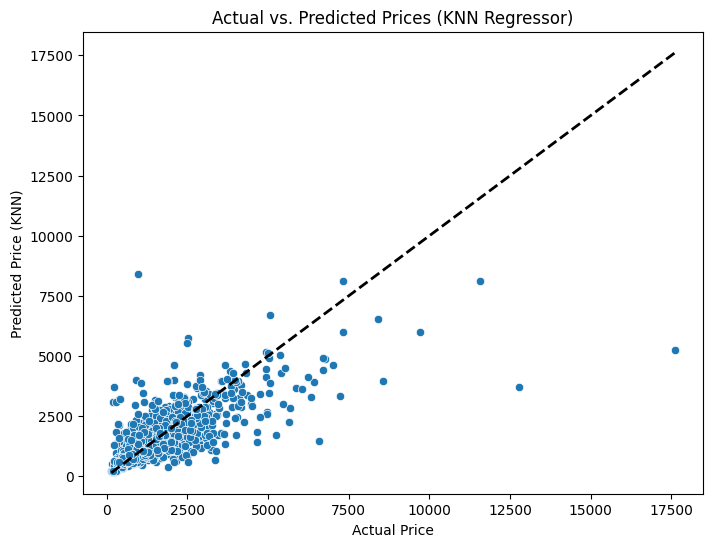

In [11]:
    # Add to Cell 4 or in a new cell
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_knn)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price (KNN)")
    plt.title("Actual vs. Predicted Prices (KNN Regressor)")
    plt.show()

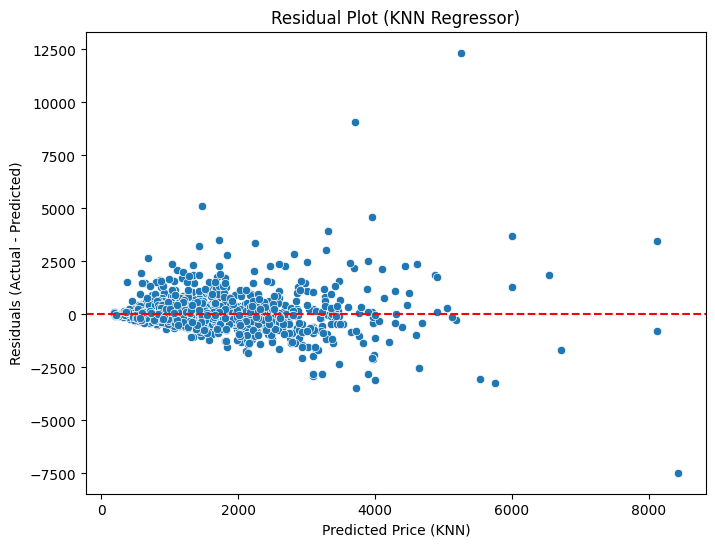

In [12]:
    # Add to Cell 4 or in a new cell
    residuals_knn = y_test - y_pred_knn
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_knn, y=residuals_knn)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Price (KNN)")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residual Plot (KNN Regressor)")
    plt.show()